Run the code cell below to begin, and select the "Hide/show all code" button to toggle code cells on/off.

In [4]:
# DATA2001 Week 2 Tutorial
# Material last updated: 28 Feb 2023
# Note: this notebook was designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
''')

# Week 2 - Data Exploration with Python

Welcome to your first tutorial for DATA2x01! We are excited to guide you through a course that should prove both challenging and relevant in a world dominated by DATA. Each week will feature a set of coding exercises, of which your tutor will demonstrate some, while others will be left as an exercise for you to complete.

The topic for this week is exploratory data analysis with Python, namely using `pandas` and `matplotlib` to perform initial data wrangling and visualisation on **Apple Music** Data from one of our 2022 tutors. Both offer detailed streaming history, but for simplicity, this tutorial focuses on the **music library** of songs itself.

Note: if you happen to be an Apple Music customer yourself, feel free to download a [copy of your own data](https://privacy.apple.com), and use this instead of the dataset we provide. Alternatively, Spotify users may still be interested in their information, and this can be downloaded [here](https://www.spotify.com/us/account/privacy), though this won’t be as useful for this tutorial (less in-depth, in JSON not CSV form, and contains other fascinating/frightening details, such as defining users based on their listening preferences e.g. "in-car listening", "fitness" or "studying or focussing"). Both also take a couple days to prepare, so you may have to return at a later date to re-crunch the numbers on your own data.

## 1. Importing Data

First, we need to import the necessary modules to run this notebook. It is **good practice** to include these at the start of your notebook so someone else running your work can see the modules required to run this on their own device.  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Read the data

We need to import our data before we can do anything with it! Make sure you have downloaded `W2_AppleMusic.csv` from Canvas and store it in the same directory as this notebook, or adjust the filepath below if you plan on storing it elsewhere.

A first step will often involve gauging how much data we have using `.shape`, and to take a glimpse of the first few rows using `.head()`.

In [76]:
rawData = pd.read_csv('W2_AppleMusic.csv')
print("Shape of the data:", rawData.shape)
rawData.head()

Shape of the data: (3119, 53)


,Unnamed: 0,Content Type,Track Identifier,Title,Sort Name,Artist,Sort Artist,Composer,Is Part of Compilation,Album,...,Release Date,Display Work Name,Purchased Track Identifier,Apple Music Track Identifier,Tag Matched Track Identifier,Playlist Only Track,Purchase Date,Sort Album Artist,Audio Matched Track Identifier,Sort Composer
0,0,Song,182857262,Never Gonna Give You Up,Never Gonna Give You Up,Rick Astley,Rick Astley,Stock Aitken Waterman,False,Whenever You Need Somebody,...,NaN,0.0,1.549351e+09,1.549351e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Song,182857266,Lay Me Down,Lay Me Down,Sam Smith,Sam Smith,"Sam Smith, James Napier & Elvin Smith",False,In the Lonely Hour,...,2013-02-15T00:00:00Z,NaN,7.926575e+08,7.926575e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Song,182857270,Everybody Wants To Rule the World,Everybody Wants To Rule the World,Tears for Fears,Tears for Fears,"Ian Stanley, Roland Orzabal & Christopher Merr...",False,Songs From the Big Chair,...,1985-02-25T04:00:00Z,0.0,9.116362e+08,9.116362e+08,911636220.0,NaN,NaN,NaN,NaN,NaN
3,3,Song,182857474,Everyday People,Everyday People,Sly & The Family Stone,Sly & The Family Stone,Sylvester Stewart,True,The Essential Sly & The Family Stone,...,1968-11-01T00:00:00Z,0.0,1.931264e+08,1.931264e+08,261151045.0,NaN,NaN,NaN,NaN,NaN
4,4,Song,182857478,Dancing Queen,Dancing Queen,ABBA,ABBA,"Benny Andersson, Stig Anderson & Björn Ulvaeus",True,ABBA Gold,...,1976-08-15T00:00:00Z,0.0,8.406096e+08,8.406096e+08,281280714.0,NaN,NaN,NaN,NaN,NaN


### 1.2 Prepare a working copy

It is once again **good practice** to make sure your raw data is immutable in case of any accidental, irreversible changes. The `.copy()` function can create a working copy of the data.

Additionally, since we are not interested in all of the 53 columns, we can take a subset using the code below. 

In [77]:
wrkData = rawData.copy()
wrkData = wrkData[['Title', 'Artist', 'Composer', 'Album', 'Genre', 'Track Year', 'Track Number On Album', 'Track Count On Album', 'Track Duration', 'Track Play Count', 'Date Added To Library', 'Last Played Date', 'Skip Count']]

It is generally good practice to make sure your column names are of the same style. The `.rename()` function allows this to be achieved with ease.
#### Can you think of other variable naming styles?  What are some of the challenges of having spaces in variable names?

In [78]:
wrkData.rename(columns={
    'Track Year': 'Year',
    'Track Number On Album': 'TrackNo',
    'Track Count On Album': 'AlbumTracks',
    'Track Duration': 'DurationMs',
    'Track Play Count': 'Plays',
    'Date Added To Library': 'Added',
    'Last Played Date': 'LastPlayed',
    'Skip Count': 'Skips'
}, inplace=True)
wrkData.head()

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips
0,Never Gonna Give You Up,Rick Astley,Stock Aitken Waterman,Whenever You Need Somebody,Pop,1987,1,10,215240,86,2016-10-01T01:30:21Z,2021-12-10T05:47:34Z,10
1,Lay Me Down,Sam Smith,"Sam Smith, James Napier & Elvin Smith",In the Lonely Hour,Pop,2013,10,10,253208,0,2016-10-01T01:31:08Z,NaN,0
2,Everybody Wants To Rule the World,Tears for Fears,"Ian Stanley, Roland Orzabal & Christopher Merr...",Songs From the Big Chair,Pop,2014,3,8,251480,56,2016-10-01T01:31:28Z,2021-10-03T17:51:03Z,3
3,Everyday People,Sly & The Family Stone,Sylvester Stewart,The Essential Sly & The Family Stone,R&B/Soul,2002,14,18,141267,47,2016-10-01T01:32:13Z,2021-12-14T03:17:54Z,2
4,Dancing Queen,ABBA,"Benny Andersson, Stig Anderson & Björn Ulvaeus",ABBA Gold,Pop,1992,1,19,231844,43,2016-10-01T01:32:28Z,2021-11-03T15:32:58Z,3


### 1.3 Initial investigation

Now that we have done some initial data wrangling, let's trial extracting smaller **subsets**, and investigate some data quality issues on the way. Notice how we can access all columns of the data and only some rows using the following code. It's also possible to extract just a few columns, by naming them in a list after the comma.

From the subset extracted below, what are some of the data quality concerns here? How could we rectify them? 

In [79]:
wrkData.loc[[507, 870, 2736], ]

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips
507,Clair De Lune,NaN,NaN,NaN,NaN,0,0,0,299311,20,2016-05-01T12:44:16Z,2016-08-25T02:15:28Z,1
870,Clair de Lune,Clair De Lune,Claude Debussy,Clair de Lune - Single,Easy Listening,2014,1,1,338155,109,2016-10-01T03:31:51Z,2021-10-23T17:21:18Z,5
2736,Moonlight Sonata,Relaxing Piano Music,Ludwig van Beethoven,Relaxing Piano Music Classics: Bach & Beethoven,Classical,2013,1,13,354307,0,2019-11-30T16:42:19Z,NaN,0


A simple step that might prove worthwhile is to drop songs where the artist field is unpopulated. We could drop all rows with blanks in any field using the basic `.dropna()` function, but this may not be wisest. Songs which haven't been played but are still in the library for example, are probably worth keeping.

We can tailor this process by only specifying the "Artist" field to drop nulls from, and confirm how the size of the dataset has changed.

In [80]:
wrkData.dropna(subset=['Artist'], inplace=True)
wrkData.shape

(3061, 13)

## 2. Data Cleaning

Equipped with the knowledge of some key quality issues, it's important we actually try and fix some of them! This can involve a variety of different techniques depending on what data you have, and what the **goal** of your analysis is. This stage is where your duplicated data frame becomes very important, so that the raw data remains intact.

### 2.1 Removing values

If we have a look at the `Year` column, we can see that there is entries that have been inputted as 0.

In [81]:
min(wrkData.Year)

0

#### Why is it problematic to leave `Year` as 0 for some rows even if we know it's a place holder?
We can change all rows where this occurs to have their `Year` replaced by `None`.

In [82]:
wrkData.loc[wrkData['Year'] == 0, 'Year'] = None
min(wrkData.Year)

1953.0

### 2.2 Date types

It is best to have a look at each column and see what `pandas` has interpreted the data type of each column to be.

In [83]:
wrkData.dtypes

Title           object
Artist          object
Composer        object
Album           object
Genre           object
Year           float64
TrackNo          int64
AlbumTracks      int64
DurationMs       int64
Plays            int64
Added           object
LastPlayed      object
Skips            int64
dtype: object

While most of these seem okay, the `Added` and `LastPlayed` columns hold Date information, but are being interpreted as text. To facilitate any calculations on these columns, we should convert to the proper data type. 

In [84]:
wrkData['Added'] = pd.to_datetime(wrkData['Added'])

**Task: Convert the `LastPlayed` column to a date field**

Note: you will get an error when you first attempt this! Investigate why this might be, correct it, and then proceed.

In [85]:
wrkData.loc[wrkData['LastPlayed'] == 'Invalid', 'LastPlayed'] = None
wrkData['LastPlayed'] = pd.to_datetime(wrkData['LastPlayed'])
min(wrkData.LastPlayed)

Timestamp('2015-04-12 20:53:11+0000', tz='UTC')

## 3. Data manipulation

### 3.1 Additional numeric columns

`DurationMs` is recorded in milliseconds, which is a level of detail beyond what's useful for our reporting. Columns can be redefined in place, such as below, where this has been converted to the nearest second. 

In [86]:
wrkData['Duration'] = round(wrkData['DurationMs'] / 1000)
wrkData.head(1)

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration
0,Never Gonna Give You Up,Rick Astley,Stock Aitken Waterman,Whenever You Need Somebody,Pop,1987.0,1,10,215240,86,2016-10-01 01:30:21+00:00,2021-12-10 05:47:34+00:00,10,215.0


String operations can be undertaken as well. For example, some genres involve a split (e.g. "Hip Hop/Rap"). We may wish to naively enumerate how many extra genres are listed, and could do so with the below code (note the 4th row - index 3 - yields 1).

In [87]:
wrkData['ExtraGenres'] = wrkData['Genre'].str.count('/')
wrkData.head()

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration,ExtraGenres
0,Never Gonna Give You Up,Rick Astley,Stock Aitken Waterman,Whenever You Need Somebody,Pop,1987.0,1,10,215240,86,2016-10-01 01:30:21+00:00,2021-12-10 05:47:34+00:00,10,215.0,0.0
1,Lay Me Down,Sam Smith,"Sam Smith, James Napier & Elvin Smith",In the Lonely Hour,Pop,2013.0,10,10,253208,0,2016-10-01 01:31:08+00:00,NaT,0,253.0,0.0
2,Everybody Wants To Rule the World,Tears for Fears,"Ian Stanley, Roland Orzabal & Christopher Merr...",Songs From the Big Chair,Pop,2014.0,3,8,251480,56,2016-10-01 01:31:28+00:00,2021-10-03 17:51:03+00:00,3,251.0,0.0
3,Everyday People,Sly & The Family Stone,Sylvester Stewart,The Essential Sly & The Family Stone,R&B/Soul,2002.0,14,18,141267,47,2016-10-01 01:32:13+00:00,2021-12-14 03:17:54+00:00,2,141.0,1.0
4,Dancing Queen,ABBA,"Benny Andersson, Stig Anderson & Björn Ulvaeus",ABBA Gold,Pop,1992.0,1,19,231844,43,2016-10-01 01:32:28+00:00,2021-11-03 15:32:58+00:00,3,232.0,0.0


Another column of interest could be `Composer`. Notice how for some songs there is only 1, while for others there is a few. 
#### How would we best count the number of composers for each song?
Additionally, what sort of assumptions would we be making here? These questions are important to both consider in your data pipeline, as well as to note down and document in deliverables.
<br><br>
**Task: Create a new column `ComposerCount` which counts the number of composers each song has**

In [88]:
wrkData['ComposerCount'] = wrkData['Composer'].str.count(',') + wrkData['Composer'].str.count('&') + 1
wrkData.head()

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration,ExtraGenres,ComposerCount
0,Never Gonna Give You Up,Rick Astley,Stock Aitken Waterman,Whenever You Need Somebody,Pop,1987.0,1,10,215240,86,2016-10-01 01:30:21+00:00,2021-12-10 05:47:34+00:00,10,215.0,0.0,1.0
1,Lay Me Down,Sam Smith,"Sam Smith, James Napier & Elvin Smith",In the Lonely Hour,Pop,2013.0,10,10,253208,0,2016-10-01 01:31:08+00:00,NaT,0,253.0,0.0,3.0
2,Everybody Wants To Rule the World,Tears for Fears,"Ian Stanley, Roland Orzabal & Christopher Merr...",Songs From the Big Chair,Pop,2014.0,3,8,251480,56,2016-10-01 01:31:28+00:00,2021-10-03 17:51:03+00:00,3,251.0,0.0,3.0
3,Everyday People,Sly & The Family Stone,Sylvester Stewart,The Essential Sly & The Family Stone,R&B/Soul,2002.0,14,18,141267,47,2016-10-01 01:32:13+00:00,2021-12-14 03:17:54+00:00,2,141.0,1.0,1.0
4,Dancing Queen,ABBA,"Benny Andersson, Stig Anderson & Björn Ulvaeus",ABBA Gold,Pop,1992.0,1,19,231844,43,2016-10-01 01:32:28+00:00,2021-11-03 15:32:58+00:00,3,232.0,0.0,3.0


### 3.2 Additional categorical columns

We may also want to provide categorical columns which act as 'flags' for the presence of a particular value. Conditional columns can be defined using the `np.where()` function. The simple example below defines all Harry Styles songs as currently "on tour", given he is currently in Australia, then returns only songs with "Sign" in the title to confirm its success.

In [89]:
wrkData['OnTour'] = np.where(wrkData['Artist'] == 'Harry Styles', 'Y', 'N')
wrkData.loc[wrkData['Title'].str.contains('Sign'), ]

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration,ExtraGenres,ComposerCount,OnTour
869,"Signed, Sealed, Delivered (I'm Yours)",Stevie Wonder,"Stevie Wonder, Lee Garrett, Syreeta Wright & L...",Number Ones,R&B/Soul,1970.0,5,20,157999,2,2016-10-01 03:30:58+00:00,2017-01-21 23:05:04+00:00,6,158.0,1.0,4.0,N
1730,Sign of the Times,Harry Styles,"Harry Styles, Jeff Bhasker, Mitch Rowland, Rya...",Harry Styles,Pop,2017.0,2,10,340707,36,2017-05-16 03:14:01+00:00,2021-06-28 05:28:42+00:00,2,341.0,0.0,6.0,Y


For a more practical example, let's say we are interested in creating a flag to warn of songs that contain potentially explicit language.

We can first have a look at what `Genre`'s we have and consider which may be susceptible.

In [90]:
wrkData.Genre.unique()

array(['Pop', 'R&B/Soul', 'French Pop', 'Folk', 'Alternative', 'Rock',
       'Singer/Songwriter', 'Easy Listening', 'Alternative & Punk', 'R&B',
       'Hip-Hop/Rap', 'Rap & Hip-Hop', 'Techno', 'Rap', 'AlternRock', nan,
       'Indie', 'Soundtrack', 'Dance', 'Soft Rock', "Children's Music",
       'Blues', 'Electronic', 'Contemporary R&B', 'Country', 'Jazz',
       'Hip-Hop', 'Indie Pop', 'Holiday', 'New Age', 'Classical', 'Punk',
       'Christian', 'Alternative Folk', 'Adult Alternative', 'Lullabies',
       'Classical Crossover', 'Hard Rock', 'Reggae', 'Comedy',
       'Indie Rock', 'Hip Hop/Rap', 'Urbano latino', 'Christmas', 'Funk',
       'Vocal', 'Traditional Folk', 'New Acoustic', 'Vocal Pop', 'K-Pop',
       'Worldwide', 'New Wave', 'Adult Contemporary', 'Oldies', 'Latin',
       'Folk-Rock', 'Soul', 'Disco', 'Old School Rap', 'Psychedelic',
       'Música tropical', 'Electronica'], dtype=object)

**Task: Create a new column `SFW` ("safe for work") which flags whether a song is potentially explicit**

For simplicity, define all songs with 'Rap' in the genre as unsafe to play when parents or young children are around. Feel free to extend this if desired!

Confirm your success by printing all songs with the "Black Eyed Peas" as the artist.

In [91]:
wrkData['SFW'] = np.where(wrkData['Genre'].str.contains('Rap'), 'N', 'Y')
wrkData.loc[wrkData['Artist'] == 'Black Eyed Peas',]

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration,ExtraGenres,ComposerCount,OnTour,SFW
1666,I Gotta Feeling,Black Eyed Peas,"William Adams, Allan Pineda, Jaime Gomez, Stac...",The E.N.D. (The Energy Never Dies) [Deluxe],Pop,2009.0,5,16,289132,0,2017-05-01 04:07:44+00:00,NaT,1,289.0,0.0,5.0,N,Y
1667,My Humps,Black Eyed Peas,William Adams & David Payton,Monkey Business,Hip-Hop/Rap,2005.0,5,16,326960,0,2017-05-01 04:07:45+00:00,NaT,1,327.0,1.0,2.0,N,N
1668,Meet Me Halfway,Black Eyed Peas,"will.i.am, Allan Pineda, Jaime Gomez & Stacy F...",The E.N.D. (The Energy Never Dies) [Deluxe],Pop,2009.0,3,16,284349,3,2017-05-01 04:07:45+00:00,2017-06-05 01:39:11+00:00,1,284.0,0.0,4.0,N,Y
1669,Boom Boom Pow,Black Eyed Peas,"will.i.am, apl.de.ap, Stacy Ferguson & Jaime G...",The E.N.D. (The Energy Never Dies) [Deluxe],Pop,2009.0,1,16,251361,0,2017-05-01 04:07:48+00:00,NaT,2,251.0,0.0,4.0,N,Y
1670,Rock That Body,Black Eyed Peas,"William Adams, Allan Pineda, Jaime Gomez, Stac...",The E.N.D. (The Energy Never Dies) [Deluxe],Pop,2009.0,2,16,268793,1,2017-05-01 04:07:50+00:00,2017-06-20 02:50:45+00:00,2,269.0,0.0,10.0,N,Y
3077,Let's Get It Started (Spike Mix) [Bonus Track],Black Eyed Peas,"William Adams, Allan Pineda, Jaime Gomez, Tere...",Elephunk,Pop,2004.0,14,15,217213,0,2021-07-11 20:43:41+00:00,NaT,0,217.0,0.0,6.0,N,Y


## 4. Analysing data

Now that we have wrangled the data, let's actually analyse it! The form of the analysis will come down to the desired output as well as scope, but for this exercise we will do some exploratory data analysis and show some of the interesting features of the dataset.

### 4.1 Ordering

When thinking about our music data, some interesting questions may come to mind: 
- What was the last song played by the user? 
- What was the first song added to their library? 
- According to their most played songs, what is their favourite artist?

Notice how once data cleaning, though arduous, is completed, these sorts of questions can be answered with ease and little code.

**Task: Write code to answer the above questions.**

Use the [`.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) or [`.nlargest()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html) functions to answer the questions, and investigate the Pandas documentation (linked) to understand more about how these operations can be used.

In [92]:
wrkData.head()

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration,ExtraGenres,ComposerCount,OnTour,SFW
0,Never Gonna Give You Up,Rick Astley,Stock Aitken Waterman,Whenever You Need Somebody,Pop,1987.0,1,10,215240,86,2016-10-01 01:30:21+00:00,2021-12-10 05:47:34+00:00,10,215.0,0.0,1.0,N,Y
1,Lay Me Down,Sam Smith,"Sam Smith, James Napier & Elvin Smith",In the Lonely Hour,Pop,2013.0,10,10,253208,0,2016-10-01 01:31:08+00:00,NaT,0,253.0,0.0,3.0,N,Y
2,Everybody Wants To Rule the World,Tears for Fears,"Ian Stanley, Roland Orzabal & Christopher Merr...",Songs From the Big Chair,Pop,2014.0,3,8,251480,56,2016-10-01 01:31:28+00:00,2021-10-03 17:51:03+00:00,3,251.0,0.0,3.0,N,Y
3,Everyday People,Sly & The Family Stone,Sylvester Stewart,The Essential Sly & The Family Stone,R&B/Soul,2002.0,14,18,141267,47,2016-10-01 01:32:13+00:00,2021-12-14 03:17:54+00:00,2,141.0,1.0,1.0,N,Y
4,Dancing Queen,ABBA,"Benny Andersson, Stig Anderson & Björn Ulvaeus",ABBA Gold,Pop,1992.0,1,19,231844,43,2016-10-01 01:32:28+00:00,2021-11-03 15:32:58+00:00,3,232.0,0.0,3.0,N,Y


In [95]:
wrkData.sort_values(by=['LastPlayed'], ascending=False).head(1)
wrkData.nlargest(1, 'LastPlayed')

,Title,Artist,Composer,Album,Genre,Year,TrackNo,AlbumTracks,DurationMs,Plays,Added,LastPlayed,Skips,Duration,ExtraGenres,ComposerCount,OnTour,SFW
3009,Deep Shadows,Little Ann,"Dave Hamilton, Rony Darrell & Ann Bridgeforth",Dave Hamilton's Detroit Dancers,R&B/Soul,1998.0,22,24,157040,12,2021-04-16 20:44:02+00:00,2022-02-19 18:44:04+00:00,1,157.0,1.0,3.0,N,Y


### 4.2 Grouping

Another technique is using one variable to aggregate over other aspects of the data. For example, we may be interested in the most prevalent artists in the dataset.

We can create a new dataframe with one row per artist rather than per song, by **"grouping by"** artist. This concept will return in later weeks of SQL, and might take a bit to get used to at first!

From there, we can instruct it to count how many titles exist for each, using the `.agg()` function, and assign that column as "Songs". From there we find the top 5, similarly to the previous question.

In [94]:
artists = wrkData.groupby('Artist').agg(Songs = ('Title','count')).reset_index()
artists.sort_values(by=['Songs'], ascending=False).head()

,Artist,Songs
965,The Beatles,160
849,Rockabye Baby!,125
779,Passenger,77
1155,alt-J,73
270,David Arnold & Michael Price,61


**Task: Determine which genres have the greatest number of plays, and also include how many skips each genre has.**

In [98]:
genres = wrkData.groupby('Genre').agg(Plays = ('Plays', 'sum'), Skips = ('Skips', 'sum')).reset_index()
genres.sort_values(by=['Plays'], ascending=False).head()

,Genre,Plays,Skips
3,Alternative,23229,2356
42,Pop,10125,1428
50,Rock,8777,1147
51,Singer/Songwriter,4281,477
46,R&B/Soul,3524,480


## 5. Visualising data

The next natural step is to visualise the data. This could be a precursor to greater statistical investigation, or stand on its own for analysis. Revising the lectures notes and/or your first year statistics will prove helpful when determining the appropriate visualisations for specific data types.

### 5.1 Histograms

Creating a histogram for songs by duration is a useful and satisfying representation of the data.

The `bins` have been set at a minimum of 0 and maximum of 1200 seconds, which excludes a few outliers (there are a couple quite long songs in the dataset). The width of each bin range has also been set to 10 seconds, which can be adjusted for more abstract or refined visuals (try changing it!).

Other aspects of the code below are purely aesthetic, such as plot titles, axis labels, colours, etc.

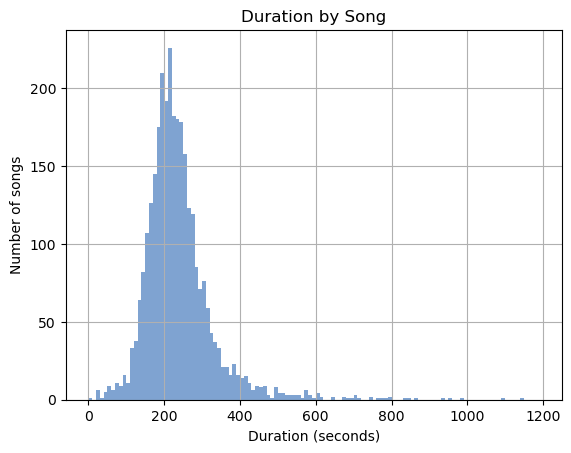

In [99]:
plt.hist(wrkData['Duration'], bins=np.arange(0,1200,10), alpha=0.5, color ="#0148A4")
plt.title('Duration by Song')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of songs')
plt.grid()

Alternatively, boxplots can be used to represent the same information in a different way.

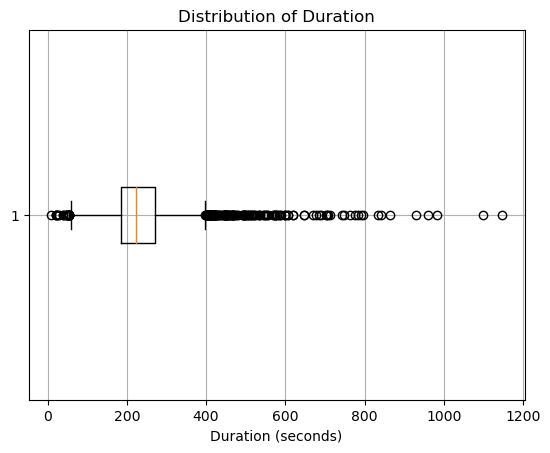

In [100]:
plt.boxplot(wrkData.loc[wrkData['Duration'] <= 1200, 'Duration'], vert=False)
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.grid()

### 5.2 Bar charts with grouping

We can also return to our `.groupby()` operation for graphs. The below is quite similar, but involves a bar chart for number of songs each year.

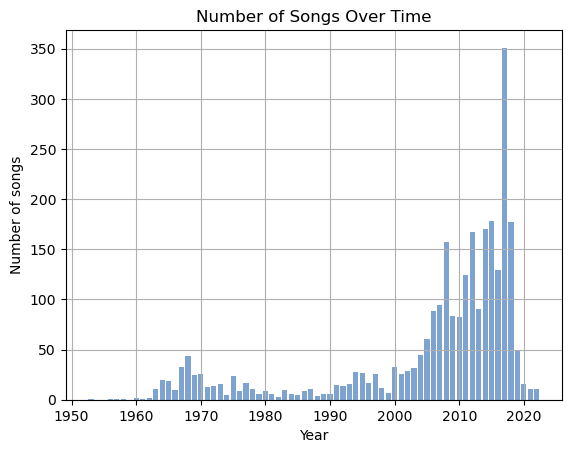

In [101]:
years = wrkData.groupby('Genre').size().reset_index(name='Songs')
plt.bar(years['Year'], years['Songs'], alpha=0.5, color ="#0148A4", align='center')
plt.title('Number of Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.grid()

### 5.3 Free choice visual

Now that you've seen how to visualise in Python, it's time to do your own!

**Task: Consider a particular variable(s) of choice and make an interesting visualisation to explore.**

{'whiskers': [<matplotlib.lines.Line2D at 0x168e93610>,
 'caps': [<matplotlib.lines.Line2D at 0x168ea4c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x168e928d0>],
 'medians': [<matplotlib.lines.Line2D at 0x168ea61d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168ea6d10>],
 'means': []}

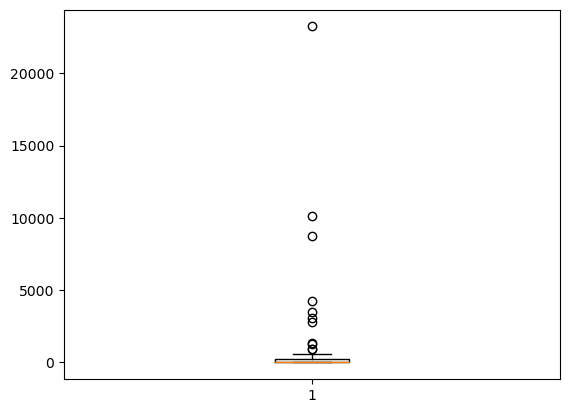

In [106]:
plt.boxplot(genres['Plays'])

## 6. Optional Extra Task

As an optional extension task - a practical use of this data could involve determining which genres the listener are most or least engaged with.

**Optional Task: Determine which genres have the highest/lowest skip ratio**

Only include genres with at least 10 encounters in your output, and the skip ratio = total skips divided by total encounters (the sum of plays and skips)

In [ ]:
### TO DO